Epoch 1/10
1563/1563 [==============================] - 70s 40ms/step - loss: 1.4893 - accuracy: 0.4601 - val_loss: 1.1925 - val_accuracy: 0.5746
Epoch 2/10
1563/1563 [==============================] - 57s 36ms/step - loss: 1.1175 - accuracy: 0.6038 - val_loss: 1.0403 - val_accuracy: 0.6359
Epoch 3/10
1563/1563 [==============================] - 57s 37ms/step - loss: 0.9622 - accuracy: 0.6602 - val_loss: 0.9869 - val_accuracy: 0.6530
Epoch 4/10
1563/1563 [==============================] - 56s 36ms/step - loss: 0.8635 - accuracy: 0.6956 - val_loss: 0.9209 - val_accuracy: 0.6809
Epoch 5/10
1563/1563 [==============================] - 60s 38ms/step - loss: 0.7865 - accuracy: 0.7248 - val_loss: 0.8965 - val_accuracy: 0.6946
Epoch 6/10
1563/1563 [==============================] - 57s 36ms/step - loss: 0.7286 - accuracy: 0.7451 - val_loss: 0.8333 - val_accuracy: 0.7120
Epoch 7/10
1563/1563 [==============================] - 57s 36ms/step - loss: 0.6840 - accuracy: 0.7608 - val_loss: 0.8310 -

INFO:tensorflow:Assets written to: image_classifier_model\assets


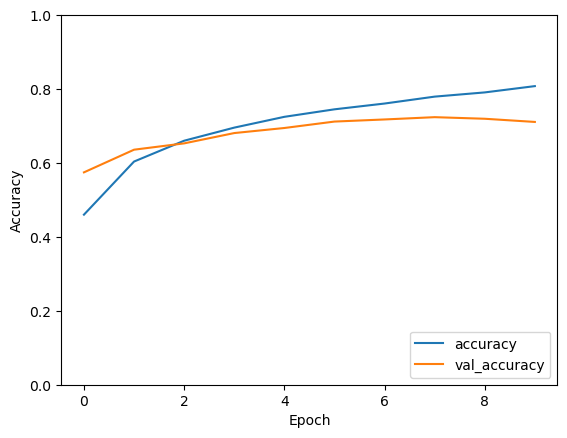

In [3]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

# Define the model architecture
def build_model():
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    return model

# Create an instance of the model
model = build_model()

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

# Evaluate the model on test data
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

# Save the model
model.save("image_classifier_model", save_format='tf')


# Plot training and validation accuracy
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

